Original notebook from: https://github.com/jakevdp/PracticalLombScargle/blob/master/figures/LINEAR_binary.ipynb

Ojbect info: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=linear+14752041&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id

In [1]:
!pip install astroML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import astroML

def get_LINEAR_lightcurve(lcid):
    from astroML.datasets import fetch_LINEAR_sample
    LINEAR_sample = fetch_LINEAR_sample()
    data = pd.DataFrame(LINEAR_sample[lcid],
                        columns=['t', 'mag', 'magerr'])
    data.to_csv('LINEAR_{0}.csv'.format(lcid), index=False)

# Uncomment to download the data
get_LINEAR_lightcurve(lcid=14752041)

In [3]:
data = pd.read_csv('LINEAR_14752041.csv')
data.head()

,t,mag,magerr
0,52653.465077,14.794,0.015
1,52653.479789,14.843,0.015
2,52653.495440,14.814,0.015
3,52653.511324,14.707,0.013
4,52653.526089,14.635,0.012


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

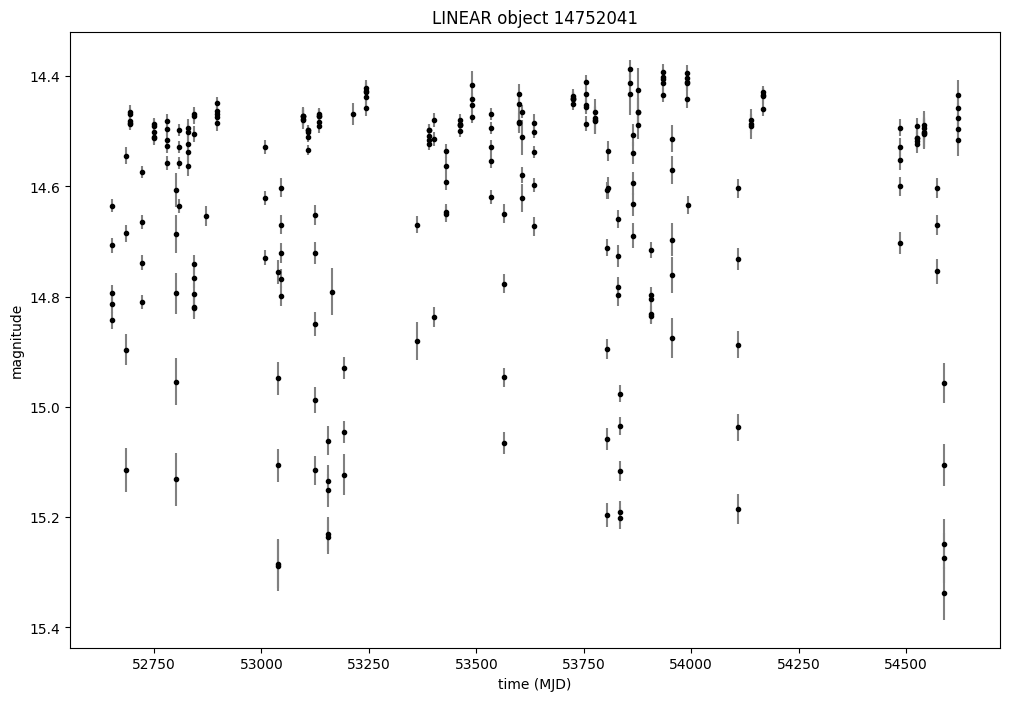

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(data.t, data.mag, data.magerr,
            fmt='.k', ecolor='gray', capsize=0)
ax.set(xlabel='time (MJD)',
       ylabel='magnitude',
       title='LINEAR object 14752041')
ax.invert_yaxis()

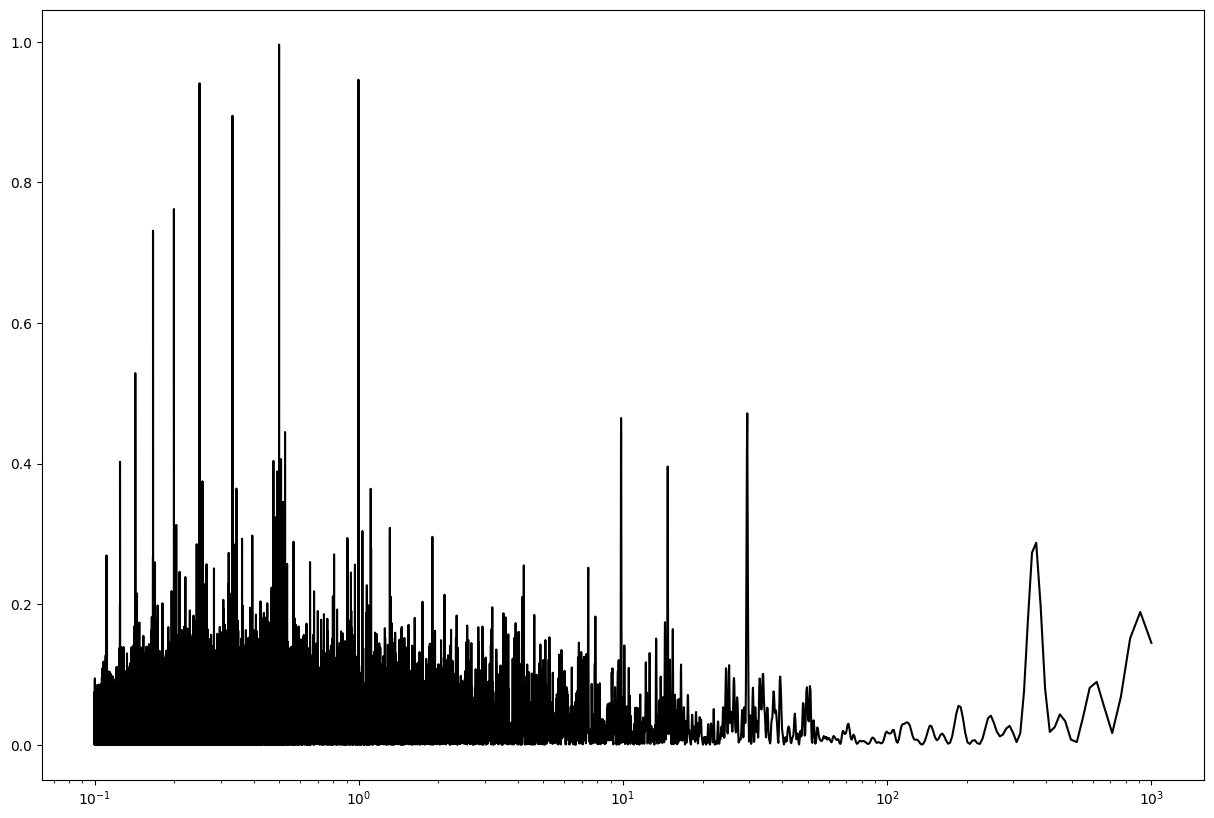

In [6]:
from astropy.timeseries import LombScargle
ls_window = LombScargle(data.t, 1, fit_mean=False, center_data=False)
freq, power = ls_window.autopower(minimum_frequency=0.001,
                                  maximum_frequency=10)

fig, ax = plt.subplots(figsize=(15, 10))
ax.semilogx(1. / freq, power, '-k');

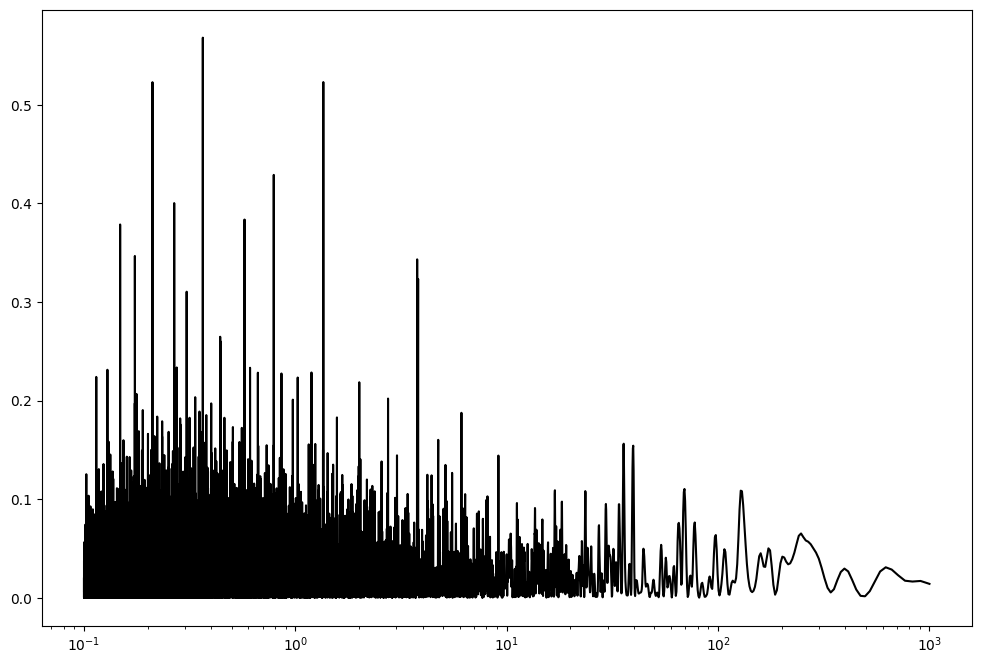

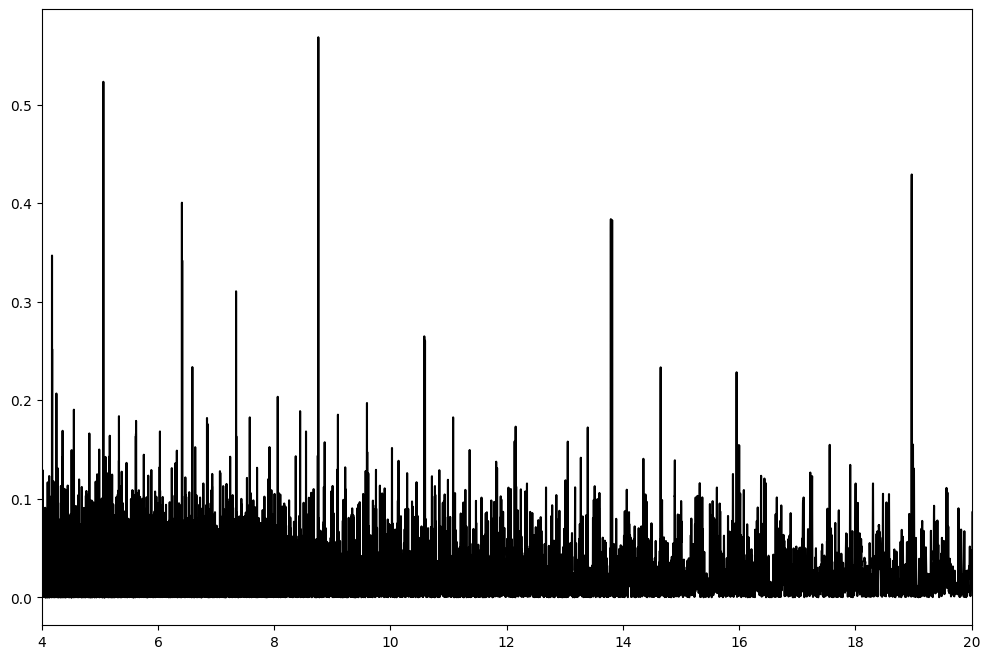

In [7]:
ls = LombScargle(data.t, data.mag, data.magerr)
freq, power = ls.autopower(minimum_frequency=0.001,
                           maximum_frequency=10)

fig, ax = plt.subplots(figsize=(12, 8))
ax.semilogx(1. / freq, power, '-k');

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(24 / freq, power, '-k')
ax.set_xlim(4, 20);

In [8]:
ls = LombScargle(data.t, data.mag, data.magerr, nterms=1)
freq, power = ls.autopower(minimum_frequency=24 / 20,
                           maximum_frequency=24 / 4)

ls6 = LombScargle(data.t, data.mag, data.magerr, nterms=6)
freq6, power6 = ls6.autopower(minimum_frequency=24 / 20,
                              maximum_frequency=24 / 4)

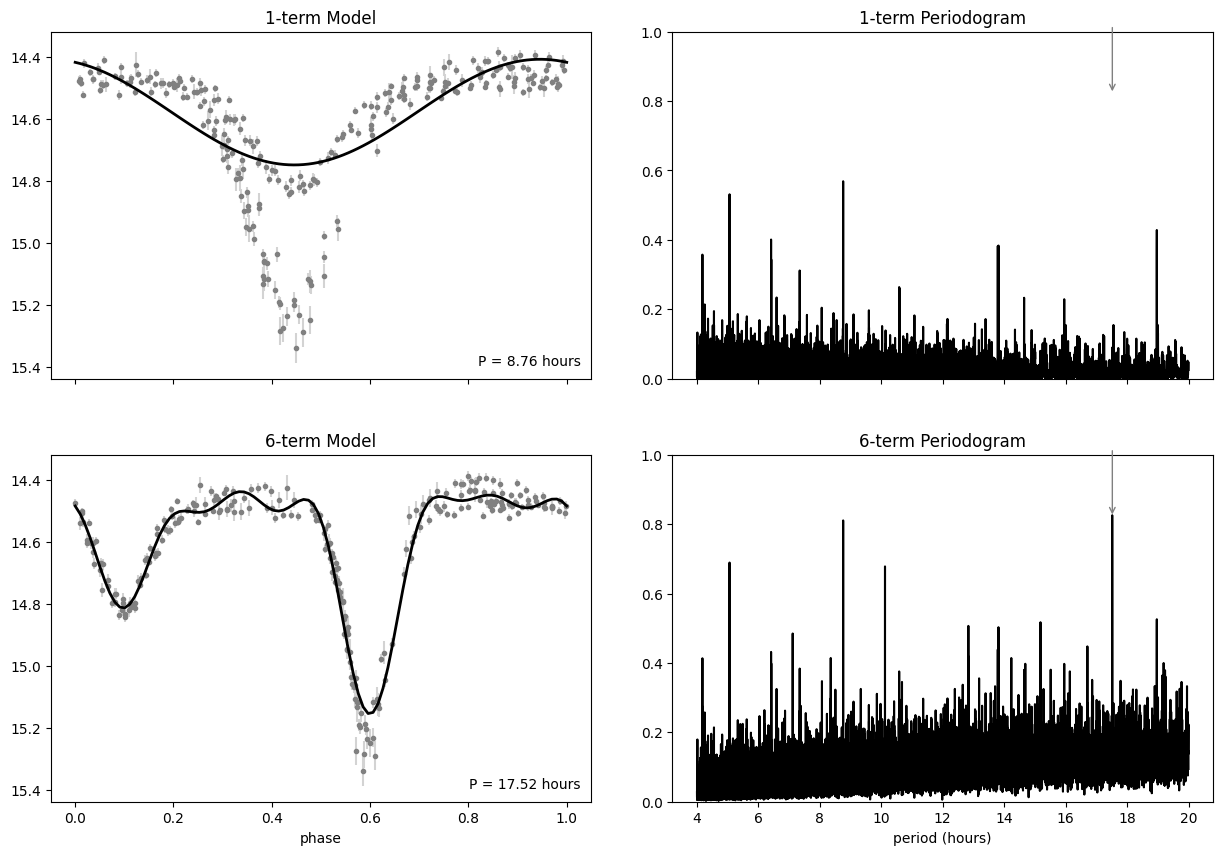

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharex='col', sharey='col')
fig.subplots_adjust(wspace=0.15, hspace=0.22)

best_freq = freq[np.argmax(power)]
best_freq6 = freq6[np.argmax(power6)]

phase_fit = np.linspace(0, 1, 100)

# get more accurate estimate for 6-term
f, p = ls6.autopower(minimum_frequency=best_freq6 - 0.01,
                     maximum_frequency=best_freq6 + 0.01,
                     samples_per_peak=30)
best_freq6 = f[np.argmax(p)]

ax[0, 0].errorbar((data.t * best_freq) % 1, data.mag, data.magerr,
                  fmt='.', color='gray', ecolor='lightgray', capsize=0, zorder=1)
ax[0, 0].plot(phase_fit, ls.model(phase_fit / best_freq, best_freq), '-k', lw=2, zorder=2)
ax[0, 0].text(0.98, 0.03, "P = {0:.2f} hours".format(24 / best_freq),
              ha='right', va='bottom', transform=ax[0, 0].transAxes)
ax[0, 0].set_title("1-term Model")

ax[1, 0].errorbar((data.t * best_freq6) % 1, data.mag, data.magerr,
                  fmt='.', color='gray', ecolor='lightgray', capsize=0, zorder=1)
ax[1, 0].plot(phase_fit, ls6.model(phase_fit / best_freq6, best_freq6), '-k', lw=2, zorder=2)
ax[1, 0].text(0.98, 0.03, "P = {0:.2f} hours".format(24 / best_freq6),
              ha='right', va='bottom', transform=ax[1, 0].transAxes)
ax[1, 0].invert_yaxis()
ax[1, 0].set_xlabel('phase')
ax[1, 0].set_title("6-term Model")

ax[0, 1].plot(24 / freq, power, '-k', rasterized=True)
ax[0, 1].set_title("1-term Periodogram")

ax[1, 1].plot(24 / freq6, power6, '-k', rasterized=True)
ax[1, 1].set_title("6-term Periodogram")
ax[1, 1].set_ylim(0, 1);
ax[1, 1].set_xlabel('period (hours)')

for axi in ax[:, 1]:
    axi.annotate('', (17.52, 0.82), (17.52, 1.02),
                 arrowprops=dict(arrowstyle="->", color='gray', lw=1))

#fig.savefig('fig23_binary_multiterm.pdf')